In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Uploading the CSV Dataset file

In [4]:
from google.colab import files
upload= files.upload()


Saving Train_churn.csv to Train_churn.csv


### Reading the Dataset file

In [5]:
data= pd.read_csv('Train_churn.csv')

# **Exploratory Data Analysis**

In [6]:
# The first 5 observation units of the dataset were accessed.
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [7]:
# Shape of dataset: it consists of 6650 observation units and 11 variables.
data.shape

(6650, 11)

In [8]:
# Feature information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [9]:
#There are no null values for any observation.
data.isnull().any()

ID                    False
Age                   False
Gender                False
Income                False
Balance               False
Vintage               False
Transaction_Status    False
Product_Holdings      False
Credit_Card           False
Credit_Category       False
Is_Churn              False
dtype: bool

In [10]:
# Descriptive statistics of the data set accessed.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,41.130226,9.685747,21.0,34.0000,40.000,47.00,72.00
Balance,6650.0,804595.354985,515754.867315,63.0,392264.2125,764938.575,1147123.71,2436615.81
Vintage,6650.0,2.250226,1.458795,0.0,1.0000,2.000,3.00,5.00
Transaction_Status,6650.0,0.515789,0.499788,0.0,0.0000,1.000,1.00,1.00
Credit_Card,6650.0,0.664361,0.472249,0.0,0.0000,1.000,1.00,1.00
Is_Churn,6650.0,0.231128,0.421586,0.0,0.0000,0.000,0.00,1.00


In [11]:
# Data types of features
data.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [12]:
#ID is an irrelevant feature for the classification, so we can drop the ID column from our dataset 
data=data.drop(columns=['ID'])

In [13]:
data.nunique()

Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

In [14]:
#Getting the value_counts of the features with object datatype
for col in data.columns:
  if(data[col].dtype=="object"):
    print(data[col].value_counts())

Male      3612
Female    3038
Name: Gender, dtype: int64
10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64
1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64
Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64


In [15]:
#Product_Holdings feature have value of 3+ for some observations which can be changed to 3 for simplicity
data['Product_Holdings']=data['Product_Holdings'].replace('3+',3)
data['Product_Holdings']=pd.to_numeric(data['Product_Holdings'])
data['Product_Holdings'].value_counts()

1    3200
2    3182
3     268
Name: Product_Holdings, dtype: int64

In [16]:
# Accessing the means for numerical features grouped by Is_Churn variable
# This shows the scale of each feature
# For example the scale of Balanced feature is more than Age feature
data.groupby("Is_Churn").agg("mean")

,Age,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card
Is_Churn,,,,,,
0,40.045375,788653.739642,2.234109,0.539605,1.568746,0.66458
1,44.739102,857626.896461,2.303839,0.436565,1.527001,0.66363


In [17]:
# Gender is grouped according to the Is_Churn variables and the dependent variable is examined.
data.groupby(["Gender", "Is_Churn"]).agg({"Is_Churn" : "count"})

Is_Churn
Gender Is_Churn          
Female 0             2261
       1              777
Male   0             2852
       1              760

In [18]:
# Credit_Category is grouped according to the Is_Churn variables and the dependent variable is examined.
data.groupby(["Credit_Category", "Is_Churn"]).agg({"Is_Churn" : "count"})

Is_Churn
Credit_Category Is_Churn          
Average         0             1572
                1              471
Good            0             1220
                1              311
Poor            0             2321
                1              755

In [19]:
# Product_Holdings is grouped according to the Is_Churn variables and the dependent variable is examined.
data.groupby(["Product_Holdings", "Is_Churn"]).agg({"Is_Churn" : "count"})

Is_Churn
Product_Holdings Is_Churn          
1                0             2414
                 1              786
2                0             2490
                 1              692
3                0              209
                 1               59

# **Data Visualisation**

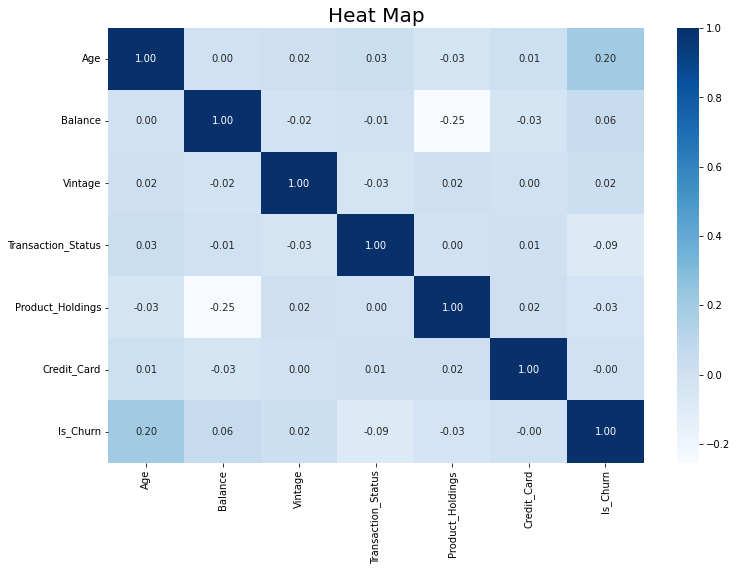

In [20]:
# Heat Map for studying the correlation between the features in the dataset
f, ax = plt.subplots(figsize= [12,8])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Blues" )
ax.set_title("Heat Map", fontsize=20)
plt.show()

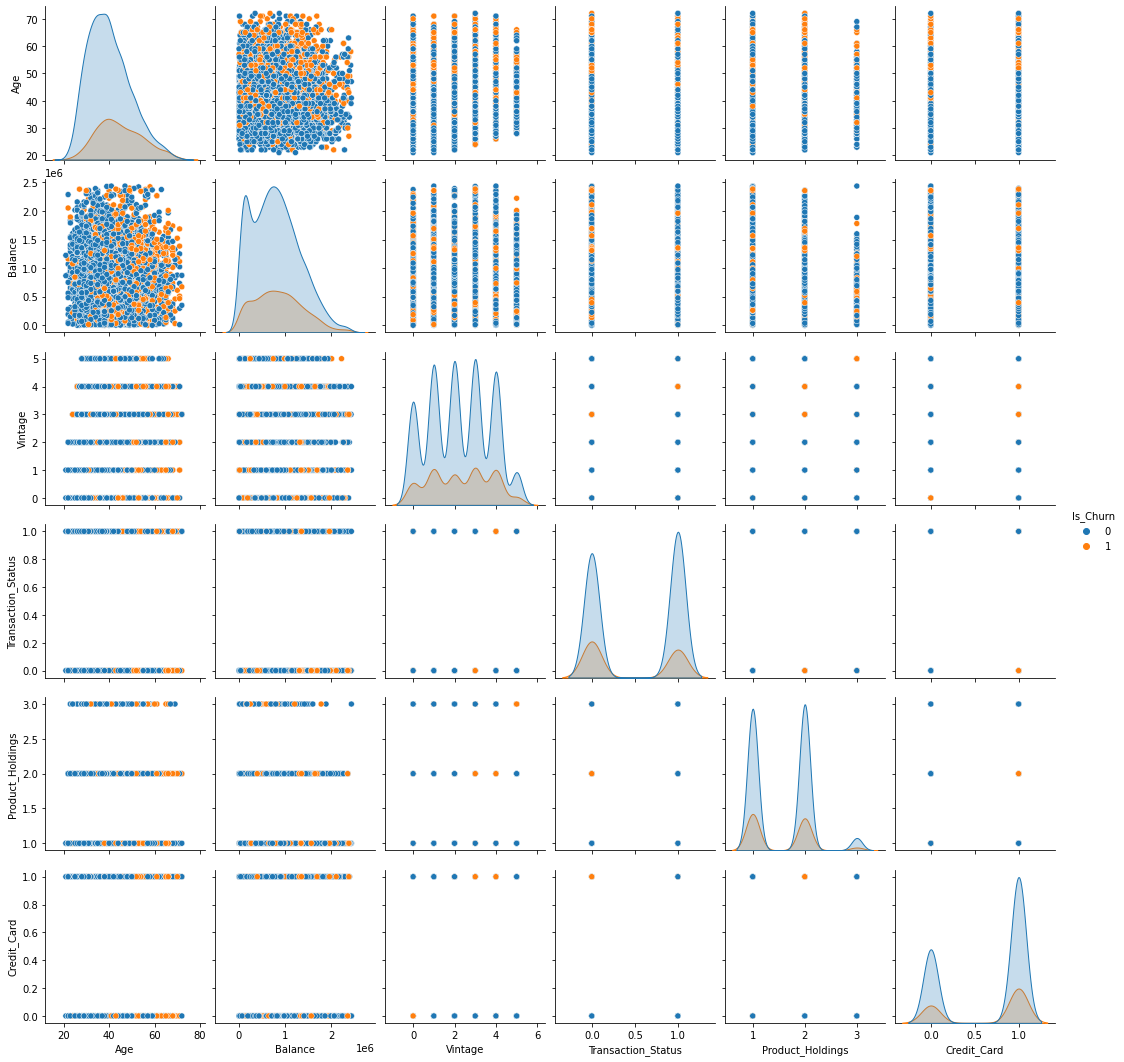

In [21]:
# Pairplot for the Dataset
sns.pairplot(data = data , hue = 'Is_Churn')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


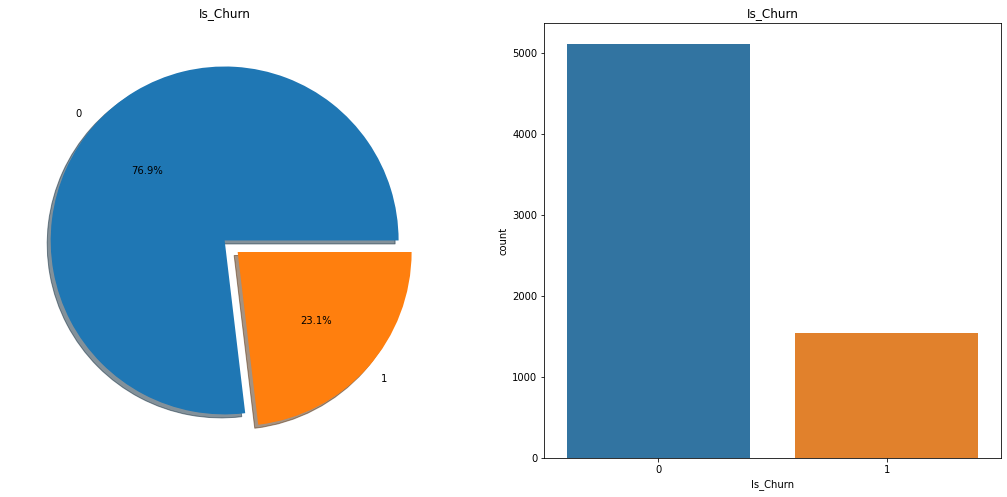

In [22]:
# Plotting the Pie Plot and Bar Plot of Dependent variable Is_Churn

f,ax=plt.subplots(1,2,figsize=(18,8))
data['Is_Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Is_Churn')
ax[0].set_ylabel('')
sns.countplot('Is_Churn',data=data,ax=ax[1])
ax[1].set_title('Is_Churn')
plt.show()

In [23]:
# The distribution of the dependent variable according to the gender variable is plotted in the pie chart.
import plotly.express as px
fig_1 = px.pie(data, values =data.groupby("Gender")["Is_Churn"].value_counts(), names = ["Female, No Churn","Female, Churn","Male, No Churn","Male, Churn"])
fig_1.show()

# **Data Preprocessing**

In [24]:
# Spilting the Dataset into data(X) and target(y)
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [25]:
# Spliting data into training and test set in 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [26]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5320, 9) (1330, 9) (5320,) (1330,)


### Preprocessing the data to run K-Fold Cross Validation

Label Encoding on Gender feature

In [27]:
le=LabelEncoder()
X['Gender']=le.fit_transform(X['Gender'])

In [28]:
# Fetching the columns in X with object datatype to apply OneHotEncoding 
col_ohe=[col for col in X.columns if X[col].dtypes=='object']
col_ohe

['Income', 'Credit_Category']

OneHotEncoding on Income and Credit_Category features

In [32]:
ohe=OneHotEncoder(handle_unknown='ignore')
X_enc=ohe.fit_transform(X[col_ohe]).toarray()

In [33]:
items=ohe.categories_
cols=[]
for c in items:
  cols.extend(c)
cols

['10L - 15L',
 '5L - 10L',
 'Less than 5L',
 'More than 15L',
 'Average',
 'Good',
 'Poor']

In [34]:
X_enc_df=pd.DataFrame(X_enc,columns=cols)
X=X.drop(col_ohe,axis=1)
X=pd.concat([X,X_enc_df],axis=1)

In [36]:
X_enc.shape

(6650, 7)

In [38]:
print(X.shape , y.shape)

(6650, 14) (6650,)


Standardizing the data

In [39]:
ss=StandardScaler()
X=ss.fit_transform(X)

### Preprocessing the training and testing data

Label Encoding on Gender feature in training and testing data

In [40]:
le=LabelEncoder()
X_train['Gender']=le.fit_transform(X_train['Gender'])
X_test['Gender']=le.transform(X_test['Gender'])

OneHotEncoding on Income and Credit_Category features in training and testing data

In [41]:
ohe=OneHotEncoder(handle_unknown='ignore')
train_enc=ohe.fit_transform(X_train[col_ohe]).toarray()
test_enc=ohe.transform(X_test[col_ohe]).toarray()

In [42]:
train_enc_df=pd.DataFrame(train_enc,columns=cols,index=X_train.index)
test_enc_df=pd.DataFrame(test_enc,columns=cols,index=X_test.index)

In [43]:
X_train=X_train.drop(col_ohe,axis=1)
X_test=X_test.drop(col_ohe,axis=1)

In [44]:
X_train=pd.concat([X_train,train_enc_df],axis=1)
X_test=pd.concat([X_test,test_enc_df],axis=1)

Standardizing the training and testing data

In [45]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# **Model Building**

In [46]:
model_names = []
results = []



### **1.K-fold Cross Validation**


In [47]:
skf=StratifiedKFold(10,shuffle=True,random_state=2)
clf = SVC(kernel='rbf', C=1, random_state=10)
scores=cross_val_score(clf,X,y,cv=skf,scoring='accuracy')
print(scores)
print("Average Accuracy in k-fold cross validation",np.average(scores))
model_names.append("K-fold Cross Validation")
results.append(np.average(scores))

[0.76842105 0.76691729 0.76842105 0.76691729 0.76842105 0.76992481
 0.76842105 0.76992481 0.76992481 0.77142857]
Average Accuracy in k-fold cross validation 0.7688721804511277


### **2. Logistic Regression**

In [48]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lrpredictions = lr_model.predict(X_test) 
model_names.append("Logistic Regression")
acc_lr = accuracy_score(y_test,lrpredictions)
results.append(acc_lr)

In [49]:
print(classification_report(y_test,lrpredictions))

              precision    recall  f1-score   support

           0       0.77      0.98      0.87      1023
           1       0.45      0.05      0.09       307

    accuracy                           0.77      1330
   macro avg       0.61      0.52      0.48      1330
weighted avg       0.70      0.77      0.69      1330



### **3. KNN Classifier**

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(X_train,y_train)
knnpredictions=knn_model.predict(X_test)
model_names.append("KNN Classifier")
acc_knn = accuracy_score(y_test,knnpredictions)
results.append(acc_knn)

In [51]:
print(classification_report(y_test,knnpredictions))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1023
           1       0.33      0.03      0.05       307

    accuracy                           0.76      1330
   macro avg       0.55      0.51      0.46      1330
weighted avg       0.67      0.76      0.68      1330



### **4. Random Forest Classifier**

In [52]:
rf_model = RandomForestClassifier(n_estimators = 100 , criterion = "gini" , random_state = 1)
rf_model.fit(X_train , y_train)
rfpredictions=rf_model.predict(X_test)
model_names.append("Random Forest Classifier")
acc_rf = accuracy_score(y_test,rfpredictions)
results.append(acc_rf)

In [53]:
print(classification_report(y_test,rfpredictions))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1023
           1       0.32      0.10      0.16       307

    accuracy                           0.74      1330
   macro avg       0.55      0.52      0.50      1330
weighted avg       0.67      0.74      0.69      1330



### **5. Gradient Boosting Classifier**

In [54]:
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train,y_train)
gbpredictions=gb_model.predict(X_test)
model_names.append("Gradient Boosting Classifier")
acc_gb = accuracy_score(y_test,gbpredictions)
results.append(acc_gb)

In [55]:
print(classification_report(y_test,gbpredictions))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1023
           1       0.45      0.06      0.10       307

    accuracy                           0.77      1330
   macro avg       0.61      0.52      0.48      1330
weighted avg       0.70      0.77      0.69      1330



### **6. Support Vector Classifier**

In [56]:
svc_model = SVC(kernel = 'rbf', random_state = 0)
svc_model.fit(X_train, y_train)
svcpredictions=svc_model.predict(X_test)
model_names.append("Support Vector Classifier")
acc_svc = accuracy_score(y_test,svcpredictions)
results.append(acc_svc)


In [57]:
print(classification_report(y_test,svcpredictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1023
           1       0.25      0.00      0.01       307

    accuracy                           0.77      1330
   macro avg       0.51      0.50      0.44      1330
weighted avg       0.65      0.77      0.67      1330




### **7. Artificial Neural Network** 

In [58]:
import tensorflow as tf
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=16,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model_names.append("Support Vector Classifier")
acc_svc = accuracy_score(y_test,svcpredictions)
results.append(acc_svc)

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
trained_model=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
167/167 [==============================] - 1s 4ms/step - loss: 0.5558 - accuracy: 0.7476 - val_loss: 0.5272 - val_accuracy: 0.7692
Epoch 2/50
167/167 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7688 - val_loss: 0.5183 - val_accuracy: 0.7692
Epoch 3/50
167/167 [==============================] - 0s 3ms/step - loss: 0.5152 - accuracy: 0.7690 - val_loss: 0.5170 - val_accuracy: 0.7699
Epoch 4/50
167/167 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7684 - val_loss: 0.5180 - val_accuracy: 0.7669
Epoch 5/50
167/167 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.7692 - val_loss: 0.5191 - val_accuracy: 0.7684
Epoch 6/50
167/167 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7722 - val_loss: 0.5181 - val_accuracy: 0.7654
Epoch 7/50
167/167 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7711 - val_loss: 0.5198 - val_accuracy: 0.7647
Epoch 

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,961
Trainable params: 2,961
Non-trainable params: 0
_________________________________________________________________


# **Model Evaluation**

In [62]:
model.evaluate(X_test,y_test)
print("Testing accuracy :",model.evaluate(X_test,y_test)[1])
print("Testing loss :",model.evaluate(X_test,y_test)[0])
model_names.append("ANN")
results.append(model.evaluate(X_test,y_test)[1])

42/42 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7511
Testing accuracy : 0.7511278390884399
42/42 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7511
Testing loss : 0.5672405362129211
42/42 [==============================] - 0s 7ms/step - loss: 0.5672 - accuracy: 0.7511


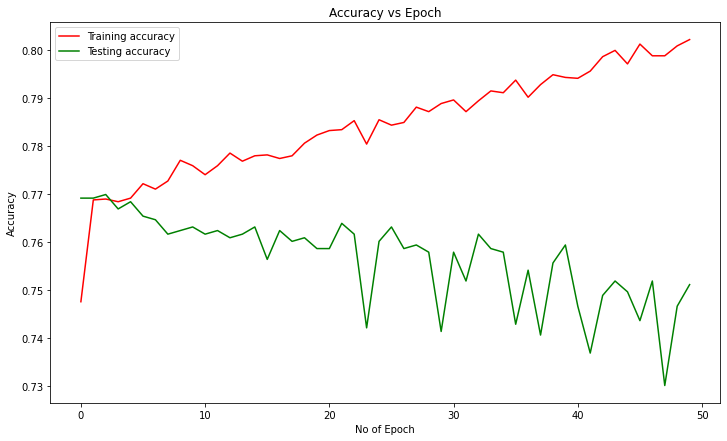

In [63]:
plt.figure(figsize=(12,7))
plt.plot(trained_model.history['accuracy'],label='Training accuracy',color='red')
plt.plot(trained_model.history['val_accuracy'],label='Testing accuracy',color='green')
plt.legend()
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Epoch")
plt.show()


In [ ]:
y_pred_prob=model.predict(X_test)
y_pred=np.where(y_pred_prob>0.5,1,0)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1023
           1       0.45      0.10      0.16       307

    accuracy                           0.76      1330
   macro avg       0.62      0.53      0.51      1330
weighted avg       0.70      0.76      0.70      1330

[[985  38]
 [276  31]]


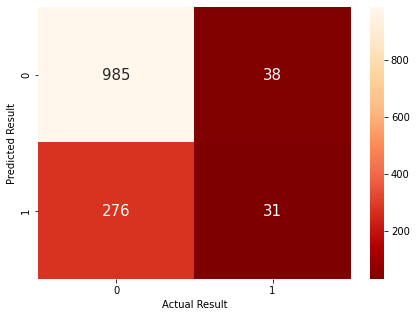

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="OrRd_r",
            fmt="d",cbar=True,
            annot_kws={"fontsize":15})
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.show()

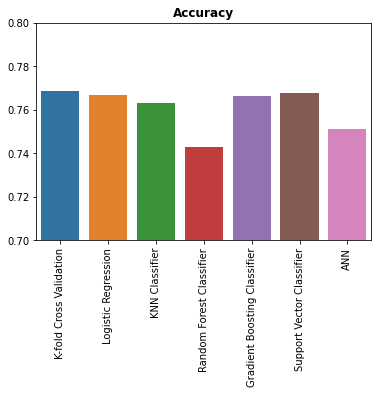

In [64]:
# Barplot showing accuracy of each model 
sns.barplot( x = model_names , y = results)
plt.xticks(rotation = 90)
plt.ylim(0.7,0.8)
plt.title('Accuracy', fontweight="bold")
plt.show()